In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read csv
df = pd.read_csv(r'C:\Users\sydne\Downloads\water_contamination.csv')
df.columns = ['Country','General Mortality Rate', 'Male Mortality Rate', 'Female Mortality Rate', 'Total Deaths', 'Male Deaths', 'Female Deaths']
df = df.drop(0)
df = df.drop(1)
df = df.reset_index(drop=True)          # drop = True ensures old index isn't kept as a column
df.iloc[160,0] = 'Turkey'
df.iloc[179,0] = 'Vietnam'
df

,Country,General Mortality Rate,Male Mortality Rate,Female Mortality Rate,Total Deaths,Male Deaths,Female Deaths
0,Afghanistan,16.6,17.2,16,6329,3363,2967
1,Albania,3.2,2.9,3.6,93,43,50
2,Algeria,4.1,4.2,3.9,1744,922,822
3,Angola,48.9,55.1,42.8,15 547,8671,6876
4,Antigua and Barbuda,2.5,2.5,2.5,2,1,1
...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),5.2,5.4,4.9,1475,761,714
179,Vietnam,6.9,7.5,6.4,6676,3597,3079
180,Yemen,15.6,16.9,14.4,4560,2481,2079
181,Zambia,35.8,39.9,31.7,6388,3529,2859


In [3]:
# countries separated by continent

Africa = "Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cabo Verde, Cameroon, Central African Republic, Chad, Comoros, Cote d'Ivoire, Democratic Republic of the Congo, Republic of the Congo, Djibouti, Egypt, Equatorial Guinea, Eritrea, Eswatini, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Ivory Coast, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Sao Tome and Principe, Senegal, Seychelles, Sierra Leone, Somalia, South Africa, South Sudan, Sudan, United Republic of Tanzania, Togo, Tunisia, Uganda, Zambia, Zimbabwe"
Asia = "Afghanistan, Armenia, Azerbaijan, Bahrain, Bangladesh, Bhutan, Brunei Darussalam, Cambodia, China, Cyprus, Georgia, India, Indonesia, Iran (Islamic Republic of), Iraq, Israel, Japan, Jordan, Kazakhstan, Kuwait, Kyrgyzstan, Lao People's Democratic Republic, Lebanon, Malaysia, Maldives, Mongolia, Myanmar, Nepal, Democratic People's Republic of Korea, Oman, Pakistan, Palestine, Philippines, Qatar, Saudi Arabia, Singapore, South Korea, Sri Lanka, Syrian Arab Republic, Taiwan, Tajikistan, Thailand, Timor-Leste, Turkey, Turkmenistan, United Arab Emirates, Uzbekistan, Vietnam, Yemen"
Europe = 'Albania, Andorra, Armenia, Austria, Azerbaijan, Belarus, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Cyprus, Czech Republic (Czechia), Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland, Italy, Kazakhstan, Kosovo, Latvia, Liechtenstein, Lithuania, Luxembourg, Malta, Republic of Moldova, Monaco, Montenegro, Netherlands (Kingdom of the), North Macedonia, Norway, Poland, Portugal, Romania, Russian Federation, San Marino, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, Ukraine, United Kingdom of Great Britain and Northern Ireland, Vatican City'
NorthAmerica = 'Antigua and Barbuda, Bahamas, Barbados, Belize, Canada, Costa Rica, Cuba, Dominica, Dominican Republic, El Salvador, Grenada, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Trinidad and Tobago, United States of America'
SouthAmerica = 'Argentina, Bolivia (Plurinational State of)	, Brazil, Chile, Colombia, Ecuador, Guyana, Paraguay, Peru, Suriname, Uruguay, Venezuela (Bolivarian Republic of)'
Oceania = 'Australia, Fiji, Kiribati, Marshall Islands, Micronesia (Federated States of), Nauru, New Zealand, Palau, Papua New Guinea, Samoa, Solomon Islands, Tonga, Tuvalu, Vanuatu'

In [4]:
df_africa = pd.DataFrame()
df_asia = pd.DataFrame()
df_europe = pd.DataFrame()
df_NA = pd.DataFrame()
df_SA = pd.DataFrame()
df_oceania = pd.DataFrame()
df_other = pd.DataFrame()


# assigning the countries to their corresponding continents
for index, country in enumerate(df['Country']):
    if country in Africa:
        add_row = df.iloc[[index]]
        df_africa = pd.concat([df_africa, add_row])
    elif country in Asia:
        add_row = df.iloc[[index]]
        df_asia = pd.concat([df_asia, add_row])
    elif country in Europe:
        add_row = df.iloc[[index]]
        df_europe = pd.concat([df_europe, add_row])
    elif country in NorthAmerica:
        add_row = df.iloc[[index]]
        df_NA = pd.concat([df_NA, add_row])
    elif country in SouthAmerica:
        add_row = df.iloc[[index]]
        df_SA = pd.concat([df_SA, add_row])
    elif country in Oceania:
        add_row = df.iloc[[index]]
        df_oceania = pd.concat([df_oceania, add_row])
    else:
        add_row = df.iloc[[index]]
        df_other = pd.concat([df_other, add_row])

# resetting indices of all dataframes
df_africa.reset_index(drop = True, inplace = True)
df_asia.reset_index(drop = True, inplace = True)
df_europe.reset_index(drop = True, inplace = True)
df_NA.reset_index(drop = True, inplace = True)
df_SA.reset_index(drop = True, inplace = True)
df_oceania.reset_index(drop = True, inplace = True)


# list of dataframes
list_continents = [df_africa, df_asia, df_europe, df_NA, df_SA, df_oceania]

In [5]:
# DATA REFORMATTING

# numeric columns list
numeric_cols = ['General Mortality Rate', 'Male Mortality Rate', 'Female Mortality Rate', 'Total Deaths', 'Male Deaths', 'Female Deaths']

#print(list_continents)
# you need to use .map to apply the replace function at the element level
for i in range (0,6):
    
    #  removing spaces in all continent dfs
    list_continents[i][numeric_cols] = list_continents[i][numeric_cols].map(lambda x: x.replace(' ', '') if isinstance(x, str) else x)

    # converting numeric columns to float
    list_continents[i][numeric_cols] = list_continents[i][numeric_cols].astype(float)


Text(0.5, 1.0, '# Deaths / 100,000 People')

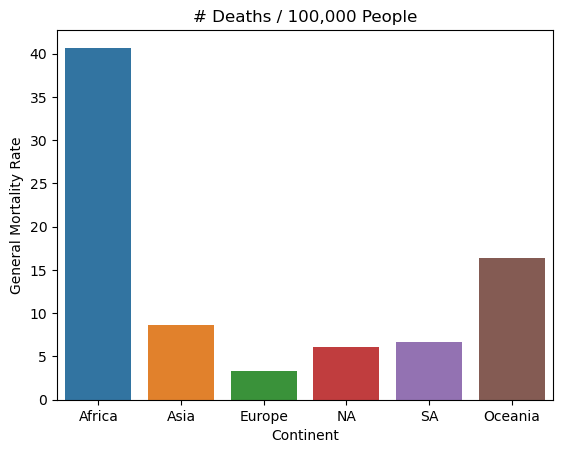

In [6]:
# GRAPH OF THE GENERAL MORTALITY RATE

import matplotlib.pyplot as plt
import seaborn as sns

# getting mean data of each continent
gm_df = []
for i in range(0,6):
    gm_df.append(list_continents[i]['General Mortality Rate'].mean())

# creating df that stores specific data to be plotted
gm_df = pd.DataFrame({'Continent':['Africa', 'Asia', 'Europe', 'NA', 'SA', 'Oceania'], 'GMR':gm_df})

sns.barplot(x='Continent', y='GMR', data=gm_df)
plt.ylabel('General Mortality Rate')
plt.title('# Deaths / 100,000 People')

This bar graph documents the number of deaths per 100,000 people. The general mortality rate overall in Africa significantly exceeds that of the other continents. This suggests that the need for health care aid is the greatest in Africa.

Standard Deviation Africa 	 25.60455750017708
Standard Deviation Asia 	 8.779735518891423
Standard Deviation Europe 	 1.5956714390595887
Standard Deviation North America 	 5.539614908396913
Standard Deviation South America 	 3.446166073488132
Standard Deviation Oceania 	 12.730056297335583


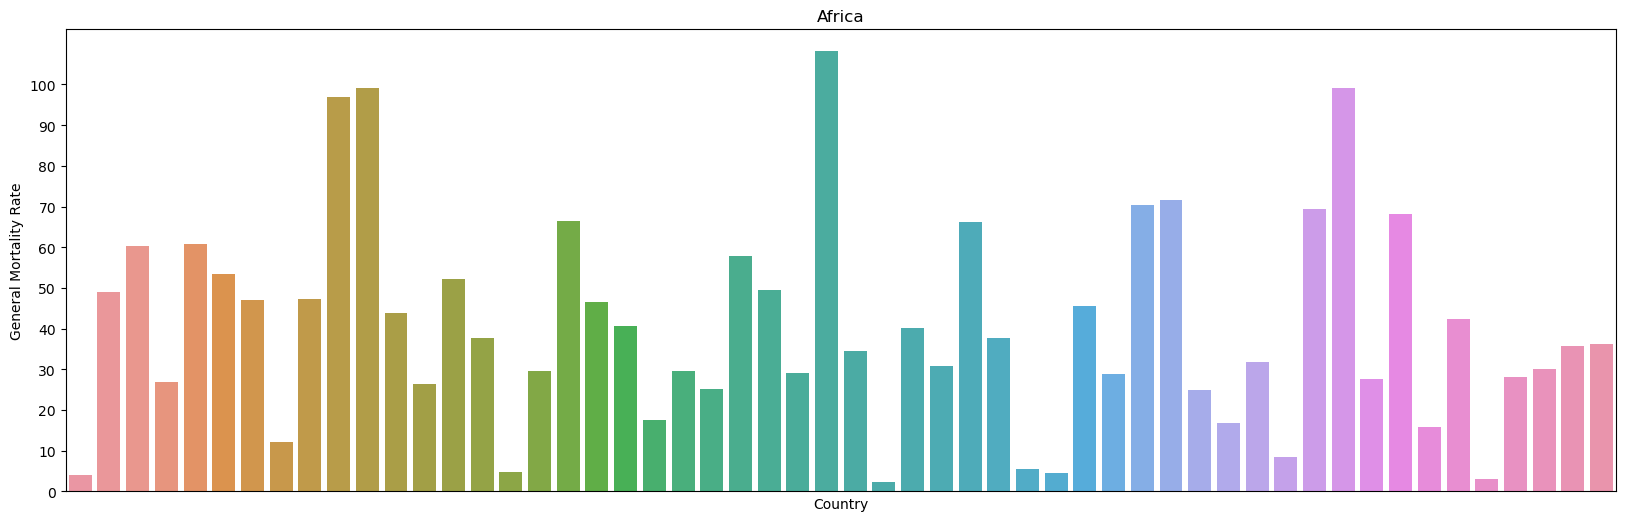

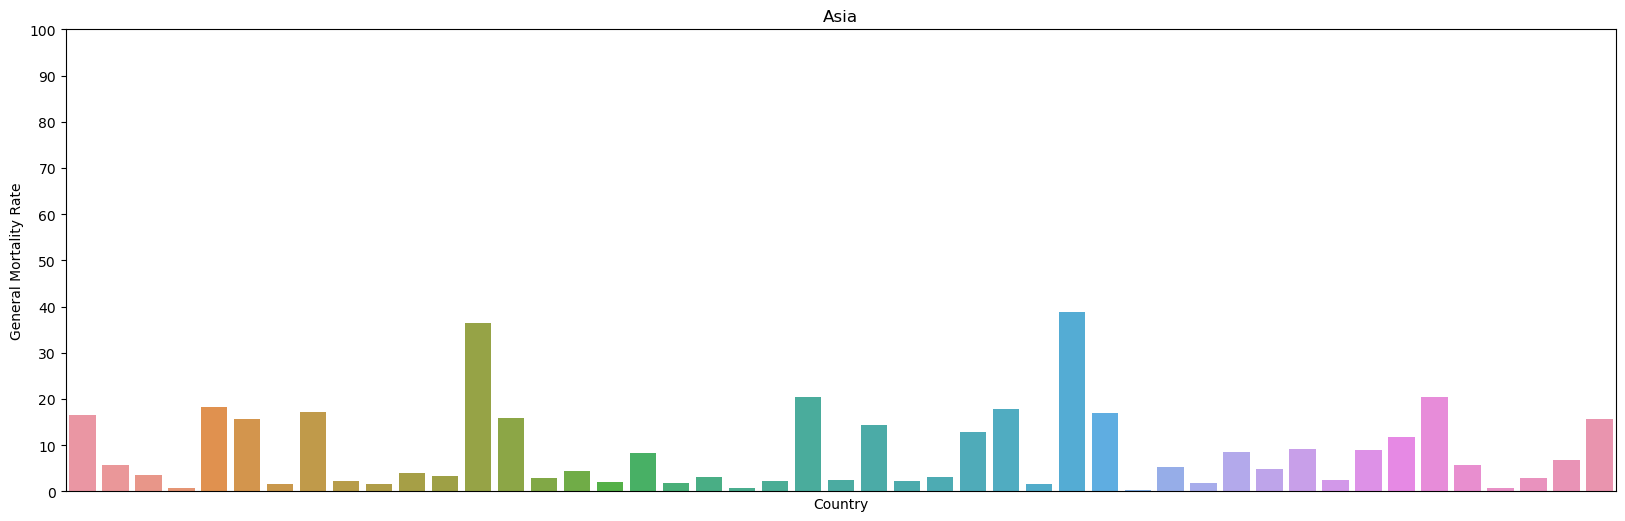

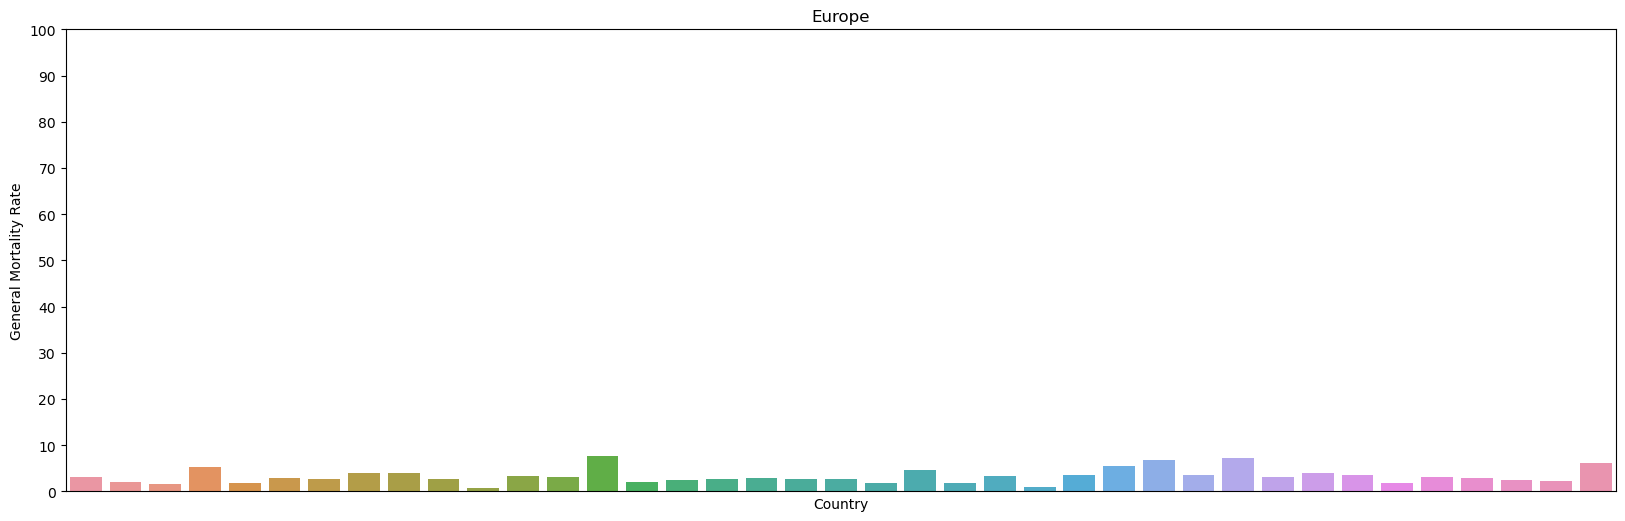

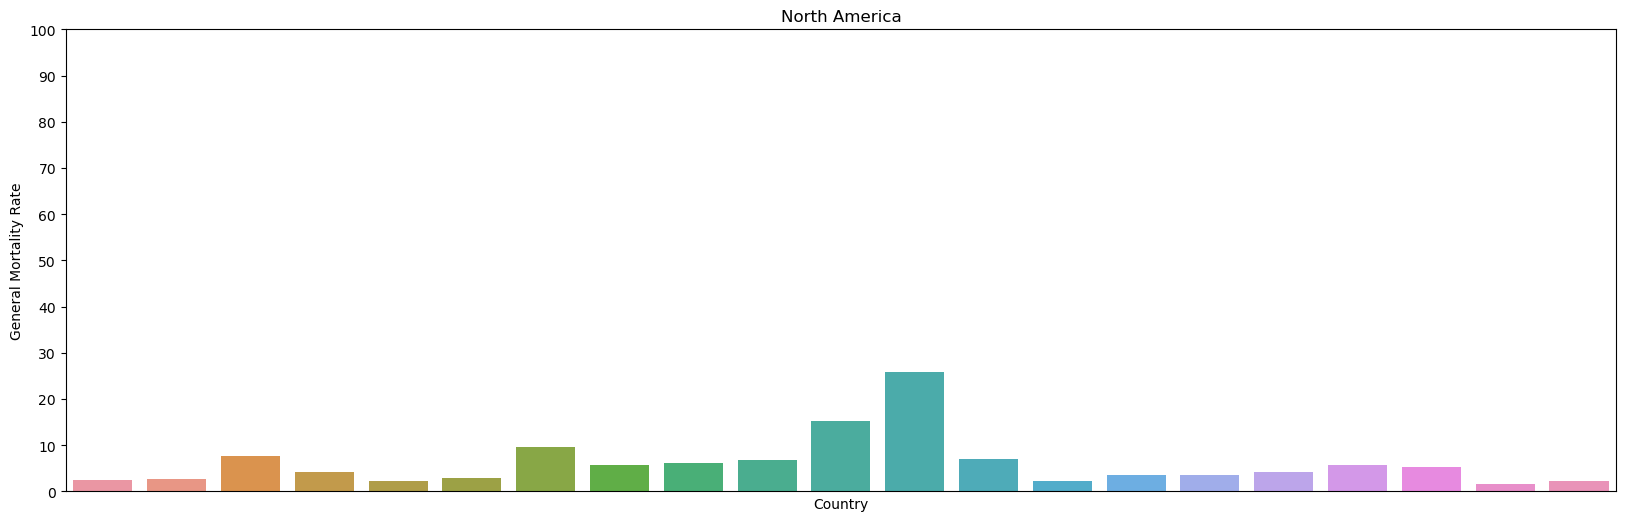

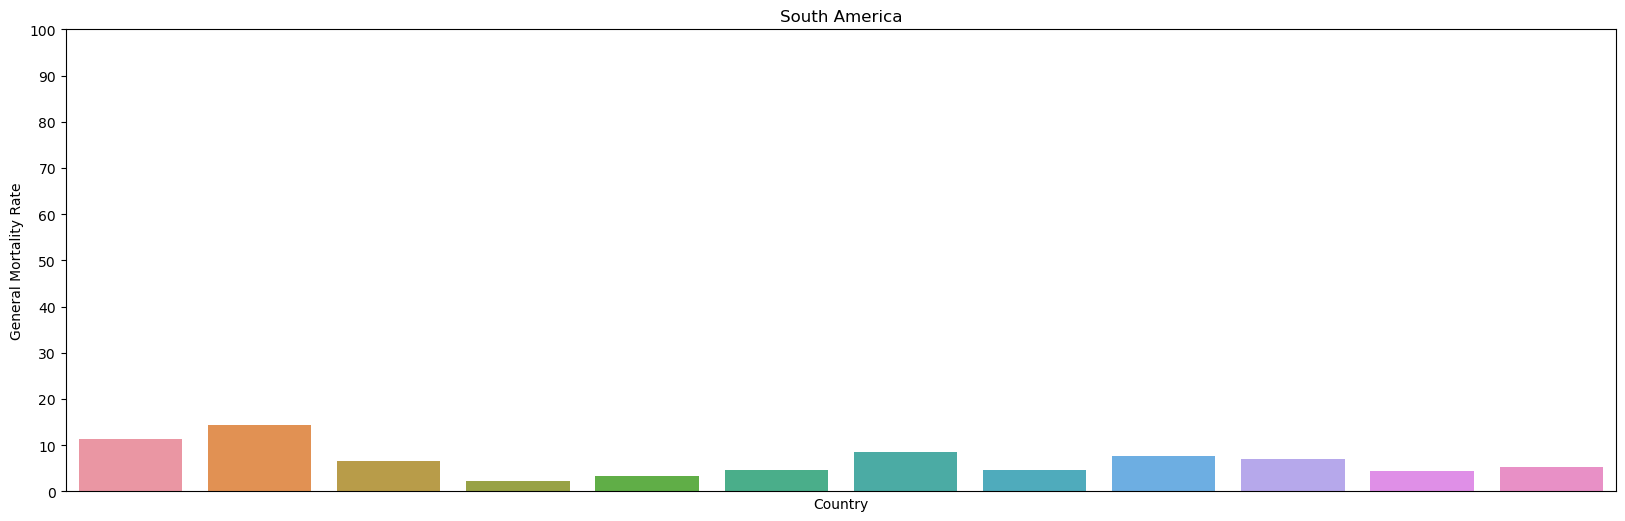

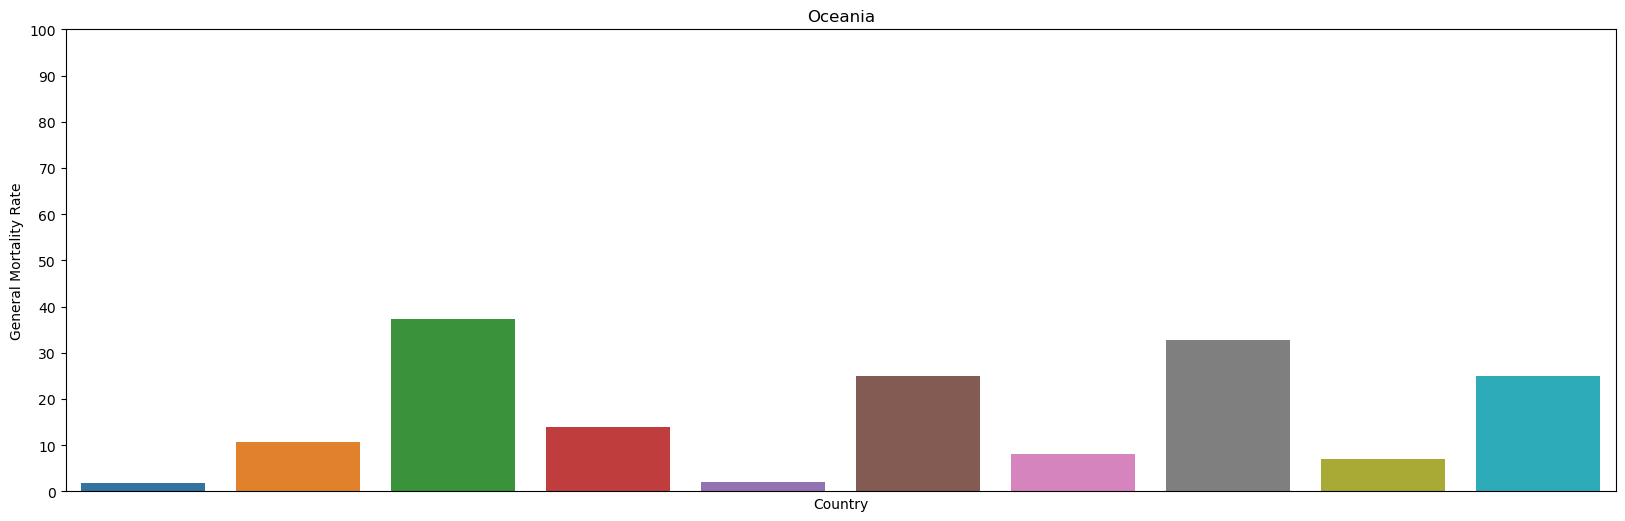

In [7]:
# Which continent has the greatest variation in its mortality rate?

continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

for i in range(0,6):
    plt.figure(figsize=(20, 6))
    continent_gm = pd.DataFrame({'Country':list_continents[i]['Country'], 'General Mortality Rate': list_continents[i]['General Mortality Rate']})
    sns.barplot(x='Country', y='General Mortality Rate', data=continent_gm)
    plt.xticks(ticks=[], labels=[])
    plt.yticks(range(0, 101, 10))
    plt.title(continents[i])
    print('Standard Deviation', continents[i], '\t', list_continents[i]['General Mortality Rate'].std())

In [40]:
# Get country on each continent with highest and lowest general mortality rate

list_extremes = []

for i in range(0, 6):
    extremes_gm = pd.DataFrame()
    index_min = list_continents[i]['General Mortality Rate'].idxmin()
    index_max = list_continents[i]['General Mortality Rate'].idxmax()
    extremes_gm = pd.concat([extremes_gm, list_continents[i].iloc[index_min], list_continents[i].iloc[index_max]], axis = 1, ignore_index = True)
    list_extremes.append(extremes_gm)

##### Displaying Countries with the Highest and Lowest General Mortality Rate in Africa, Asia, and South America

In [47]:
# Df for extreme countries in each continent
df_list = [list_extremes[0], list_extremes[1], list_extremes[2], list_extremes[3], list_extremes[4], list_extremes[5]]  

# Concatenate all DataFrames
df_extremes = pd.concat(df_list, axis=1)
df_extremes.iloc[0,9] = 'Bolivia'

# Rename the columns for better readability
df_extremes.columns = df_extremes.iloc[0]
col_list = [('Africa', 'Libya'), ('Africa', 'Lesotho'), ('Asia', 'Qatar'), ('Asia', 'Pakistan'), ('Europe', 'Finland'), ('Europe', 'Greece'), ('North America', 'Trinidad and Tobago'), ('North Amer', 'Haiti'), ('South America', 'Chile'), ('South Amer', 'Bolivia'), ('Oceania', 'Australia'), ('Oceania', 'Kiribati')]
col_multi = pd.MultiIndex.from_tuples(col_list)
df_extremes.columns = col_multi
                                                                                                  

In [48]:
df_extremes

Africa            Asia             Europe          \
                        Libya  Lesotho  Qatar  Pakistan  Finland  Greece   
Country                 Libya  Lesotho  Qatar  Pakistan  Finland  Greece   
General Mortality Rate    2.2    108.1    0.4      38.8      0.8     7.6   
Male Mortality Rate       2.2    116.9    0.3      39.7      0.7     6.6   
Female Mortality Rate     2.1     99.5    0.8      37.9      0.9     8.7   
Total Deaths            146.0   2297.0   12.0   84018.0     44.0   799.0   
Male Deaths              75.0   1225.0    7.0   44228.0     20.0   337.0   
Female Deaths            71.0   1072.0    5.0   39790.0     24.0   462.0   

                              North America North Amer South America  \
                        Trinidad and Tobago      Haiti         Chile   
Country                 Trinidad and Tobago      Haiti         Chile   
General Mortality Rate                  1.6       25.9           2.3   
Male Mortality Rate                     1.9       27.1           2.2   
Female Mortality Rate                   1.4       24.8           2.4   
Total Deaths                           22.0     2921.0         429.0   
Male Deaths                            13.0     1508.0         203.0   
Female Deaths                          10.0     1414.0         226.0   

                       South Amer    Oceania            
                          Bolivia  Australia  Kiribati  
Country                   Bolivia  Australia  Kiribati  
General Mortality Rate       14.3        1.9      37.4  
Male Mortality Rate          12.8        1.7      31.0  
Female Mortality Rate        15.8        2.1      43.6  
Total Deaths               1643.0      472.0      44.0  
Male Deaths                 740.0      209.0      18.0  
Female Deaths               903.0      263.0      26.0

The dataframe of the country with the highest and lowest general mortality rate in each continent provides insight into the overall state of the continent. Based on the data, it appears that Africa has the largest standard deviation, however, further research is needed. The large discrepancy could be due to inaccurate records. In comparison, Europe has the smallest standard devviation, its the general mortality rate for both its worst and best performing countries are both low. This reflects the developed heath care system that is in place in Europe. 